# Load raw data from the data_agg service

In [1]:
from urllib.request import urlopen
import pandas as pd
import seaborn as sns

In [2]:
response = urlopen("http://data_agg/data/json")

df = pd.read_json(response.read().decode("utf-8"))

In [3]:
df["particle_no"] = pd.Categorical(df.pid).codes

In [4]:
df

,t,x,y,pid,particle_no
0,1,0.280071,0.770232,c825b825-6062-455c-9f48-076355d95c7e,5
1,2,-0.225586,0.511909,c825b825-6062-455c-9f48-076355d95c7e,5
2,3,-1.054858,0.547397,c825b825-6062-455c-9f48-076355d95c7e,5
3,4,-1.090436,1.150183,c825b825-6062-455c-9f48-076355d95c7e,5
4,5,-0.189602,1.394444,c825b825-6062-455c-9f48-076355d95c7e,5
...,...,...,...,...,...
147,13,-0.152734,-0.990141,0691bdfc-2d46-4334-a6f1-31939b011696,1
148,14,-0.903060,-0.416839,0691bdfc-2d46-4334-a6f1-31939b011696,1
149,15,-1.028677,0.061779,0691bdfc-2d46-4334-a6f1-31939b011696,1
150,16,-1.167308,-0.097708,0691bdfc-2d46-4334-a6f1-31939b011696,1


In [5]:
sns.set_style("darkgrid")

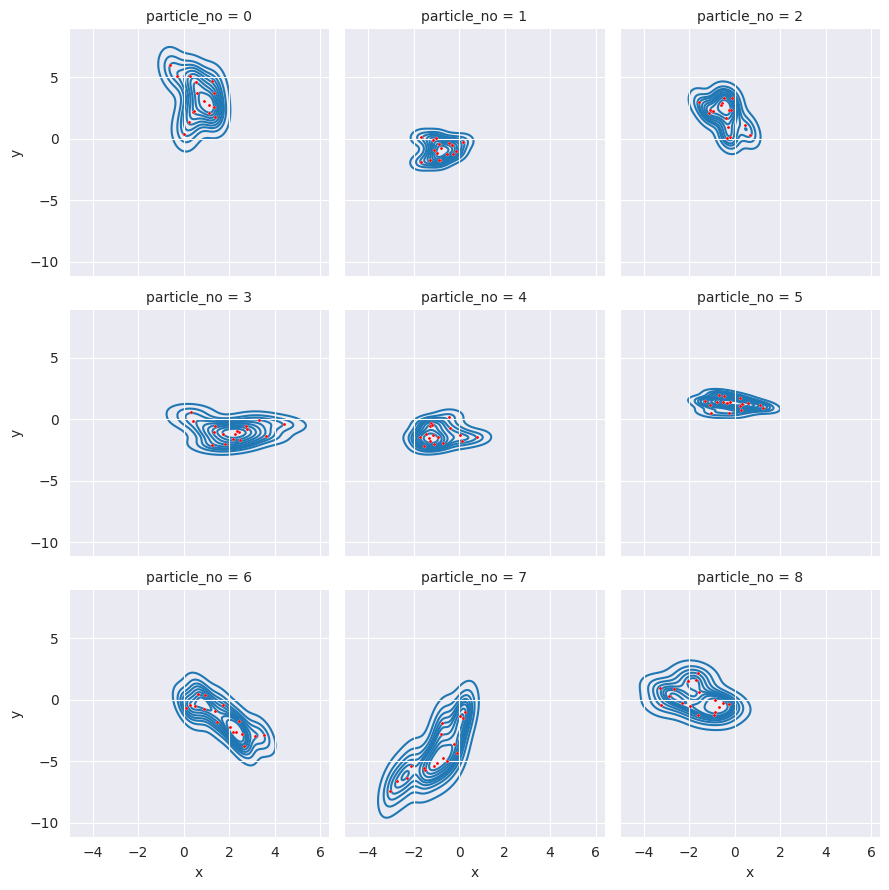

In [6]:
g = sns.FacetGrid(df, col="particle_no",  col_wrap=3)
g.map(sns.kdeplot, "x", "y", zorder=-1)
g.map(sns.scatterplot, "x", "y", color="r", s=5)